In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
temp = pd.read_csv('./train.csv')
temp # 훈련데이터 형식 확인

,ID,ADDRESS,SUBURB,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,9 Crumlin Way,Ridgewood,520000,5,2,4.0,674,266,2007.0,35500,Butler Station,3000,09-2015\r,6030,-31.656206,115.720566,IRENE MCCORMACK CATHOLIC COLLEGE,1.079230,120.0
1,1,37 Sissinghurst Crescent,Landsdale,575000,5,4,2.0,540,301,2014.0,16900,Whitfords Station,8100,07-2018\r,6065,-31.800802,115.867675,LANDSDALE CHRISTIAN SCHOOL,0.667585,NaN
2,2,24 Tees Court,Mindarie,760000,4,2,2.0,781,220,1992.0,33500,Clarkson Station,3500,02-2020\r,6030,-31.682040,115.702600,MINDARIE SENIOR COLLEGE,0.650761,111.0
3,3,31 Brentham Street,Mount Hawthorn,1230000,2,1,2.0,425,185,1938.0,3500,Leederville Station,1500,07-2020\r,6016,-31.926046,115.838181,ARANMORE CATHOLIC COLLEGE,0.484465,106.0
4,4,46/1 Corkhill Street,North Fremantle,2010000,3,2,2.0,546,186,2004.0,12900,North Fremantle Station,800,10-2017\r,6159,-32.032079,115.759626,JOHN CURTIN COLLEGE OF THE ARTS,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,36 Kentucky Boulevard,Hocking,475000,4,2,2.0,533,198,2007.0,21200,Edgewater Station,4400,04-2018\r,6065,-31.764187,115.824151,WANNEROO SECONDARY COLLEGE,1.104533,131.0
18506,18506,10 Regatta Boulevard,Champion Lakes,485000,3,2,2.0,344,237,2010.0,22100,Kelmscott Station,1900,06-2011\r,6111,-32.114990,115.992834,JOHN WOLLASTON ANGLICAN COMMUNITY SCHOOL,1.816768,40.0
18507,18507,145 Coolgardie Avenue,Redcliffe,642000,3,1,1.0,1016,110,1953.0,8900,Bassendean Station,3100,01-2018\r,6104,-31.931320,115.950060,CYRIL JACKSON SENIOR CAMPUS,2.169696,NaN
18508,18508,12 Mckenzie Road,Samson,491000,4,2,2.0,718,176,1988.0,14600,Murdoch Station,5400,03-2009\r,6163,-32.070861,115.793834,SETON CATHOLIC COLLEGE,0.208669,91.0


In [3]:
temp = temp.drop(['ADDRESS','SUBURB','NEAREST_STN','DATE_SOLD','NEAREST_SCH'], axis=1)
# 비선형 컬럼 다 삭제 (값 예측에 쓸모없을 것 같아서... 주소, 동네이름, 근처 역명, 팔린 날짜, 가까운 학교명)

In [4]:
temp.columns
# 훈련 컬럼 확인

Index(['ID', 'PRICE', 'BEDROOMS', 'BATHROOMS', 'GARAGE', 'LAND_AREA',
       'FLOOR_AREA', 'BUILD_YEAR', 'CBD_DIST', 'NEAREST_STN_DIST', 'POSTCODE',
       'LATITUDE', 'LONGITUDE', 'NEAREST_SCH_DIST', 'NEAREST_SCH_RANK'],
      dtype='object')

In [5]:
temp['PRICE'].sum() / 18510
# 집값 평균값 체크 634772..

634772.6629929767

In [6]:
temp.isnull().sum(), temp.shape
# 훈련데이터 결측치 수 확인, 형태 확인

(ID                     0
 PRICE                  0
 BEDROOMS               0
 BATHROOMS              0
 GARAGE              1367
 LAND_AREA              0
 FLOOR_AREA             0
 BUILD_YEAR          1728
 CBD_DIST               0
 NEAREST_STN_DIST       0
 POSTCODE               0
 LATITUDE               0
 LONGITUDE              0
 NEAREST_SCH_DIST       0
 NEAREST_SCH_RANK    6000
 dtype: int64,
 (18510, 15))

In [7]:
temp.describe()
# 훈련데이터 통계확인 ... 쓸만한 분석은 하지 못했음

,ID,PRICE,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,18510.000000,1.851000e+04,18510.000000,18510.000000,17143.00000,18510.000000,18510.000000,16782.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,18510.000000,12510.000000
mean,9254.500000,6.347727e+05,3.660832,1.825500,2.19979,2829.570989,183.503133,1989.805327,19863.048460,4540.610535,6089.609941,-31.960778,115.879046,1.822744,72.687050
std,5343.521077,3.528771e+05,0.753643,0.577664,1.43047,19462.593515,72.224694,21.003456,11352.697459,4534.872190,62.047786,0.178444,0.118215,1.777296,40.538834
min,0.000000,5.100000e+04,1.000000,1.000000,1.00000,61.000000,1.000000,1868.000000,681.000000,46.000000,6003.000000,-32.472979,115.586030,0.070912,1.000000
25%,4627.250000,4.050250e+05,3.000000,1.000000,2.00000,502.000000,130.000000,1979.000000,11300.000000,1800.000000,6050.000000,-32.069802,115.789277,0.879571,39.000000
50%,9254.500000,5.350000e+05,4.000000,2.000000,2.00000,680.000000,172.000000,1995.000000,17600.000000,3200.000000,6069.000000,-31.934225,115.853970,1.349596,68.000000
75%,13881.750000,7.600000e+05,4.000000,2.000000,2.00000,836.000000,222.000000,2005.000000,26600.000000,5300.000000,6150.000000,-31.843167,115.970937,2.094710,105.000000
max,18509.000000,2.440000e+06,10.000000,6.000000,99.00000,999999.000000,870.000000,2017.000000,59800.000000,35500.000000,6558.000000,-31.462553,116.341780,23.254372,139.000000


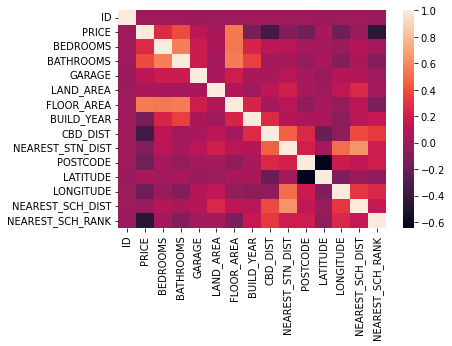

In [8]:
ax = sns.heatmap(temp.corr())
plt.show() 
# 히트맵으로 표현, 오른쪽 색이 1에 가까울수록 서로 관련 높은 계수들
# BEDROOMS, BATHROOMS, FLOOR_AREA 들이 가장 가격과 상관관계가 높음

# BEDROOMS과 상관관계가 높은 특성치 : BATHROOMS, FLOOR_AREA, BUILD_YEAR(이게 왜?)
# BATHROOMS과 상관관계가 높은 특성치 : GARAGE(차고...), FLOOR_AREA, BUILD_YEAR(그냥 신식이 좋은 듯...)
# NEAREST_STN_DIST(역)과 상관관계가 높은 특성치 : NEAREST_SCH_DIST(학교 거리), LONGITUDE(경도...?)

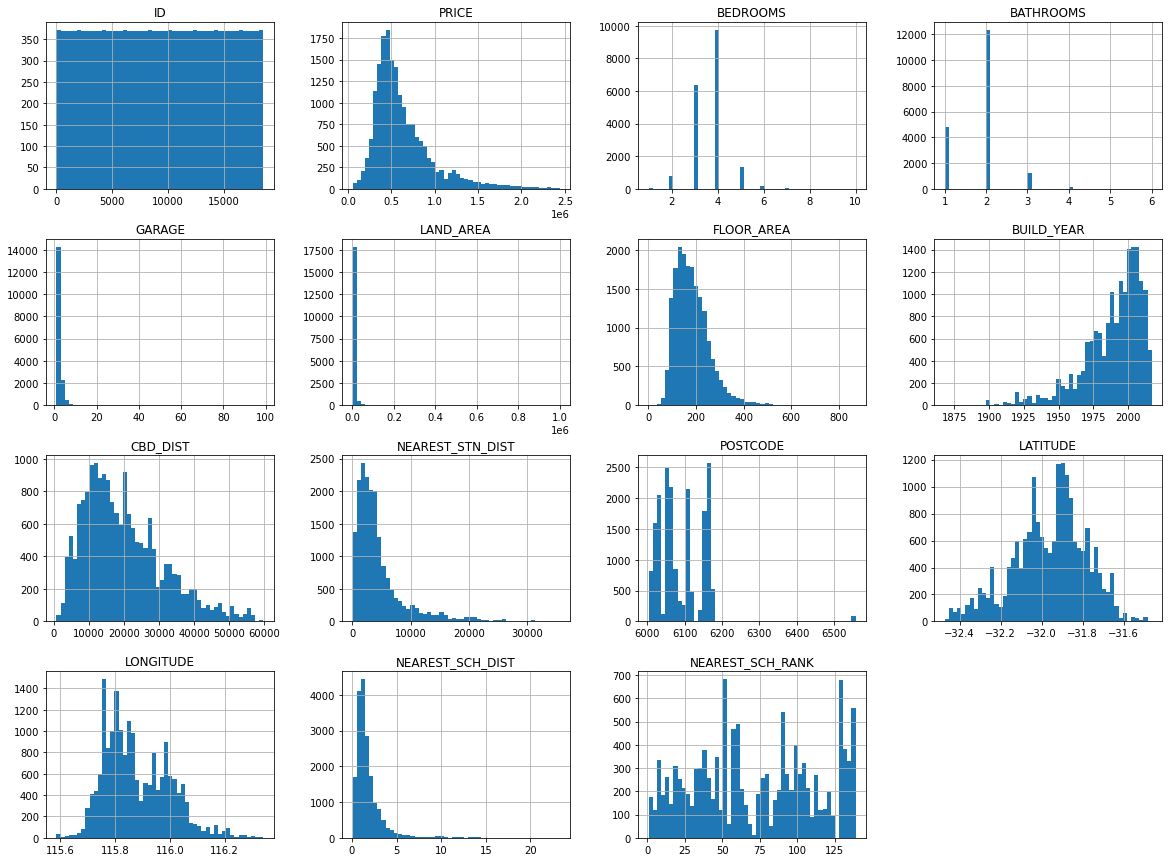

In [9]:
fig = temp.hist(bins=50, figsize=(20,15))
# 각 컬럼값들 히스토그램으로 빗금 표시하여 시각화

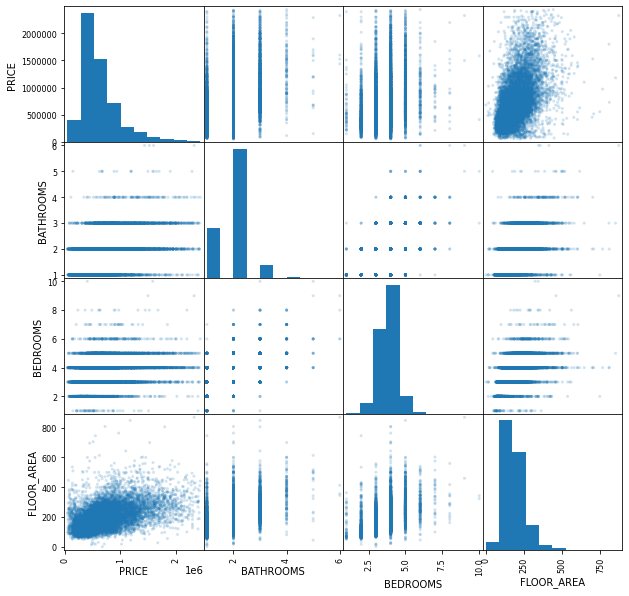

In [10]:
from pandas.plotting import scatter_matrix

corr_matrix = temp.corr()
attributes = ['PRICE','BATHROOMS','BEDROOMS','FLOOR_AREA']
fig = scatter_matrix(temp[attributes], figsize = (10,10), alpha = 0.2)
# 위 히트맵에서 가격과 가장 상관있어보이는 컬럼 층면적, 욕실 수, 침실 수 산점도 확인
# 매우 선형?적인듯

In [11]:
temp['GARAGE']=temp['GARAGE'].fillna(0)
temp['BUILD_YEAR']=temp['BUILD_YEAR'].fillna(0)
temp['NEAREST_SCH_RANK']=temp['NEAREST_SCH_RANK'].fillna(0)

# 결측치 0으로 채우는 방법 채택

In [12]:
temp.isnull().sum()
temp_tr = pd.DataFrame(temp)

# 훈련데이터 결측치 수 확인, 훈련에 사용할 데이터 프레임 처리

In [13]:
# imputer 함수로 중앙값, 평균값, 최빈값, 상수값?(const)로 결측치 채울 수 있음
# 라이브러리에서 확인가능

# imputer.fit(temp)
# X = imputer.transform(temp)
# temp_tr = pd.DataFrame(X, columns=temp.columns)
# temp_tr.tail()

In [14]:
temp_tr.to_csv("train_reg.csv", index=False)
# 오토글루언 라이브러리 돌려보기 위해 저장

In [15]:
temp_tr.isnull().sum()
# 훈련데이터 마지막 결측치 수 확인

ID                  0
PRICE               0
BEDROOMS            0
BATHROOMS           0
GARAGE              0
LAND_AREA           0
FLOOR_AREA          0
BUILD_YEAR          0
CBD_DIST            0
NEAREST_STN_DIST    0
POSTCODE            0
LATITUDE            0
LONGITUDE           0
NEAREST_SCH_DIST    0
NEAREST_SCH_RANK    0
dtype: int64

In [16]:
temp_labels = temp_tr["PRICE"].copy() # 가격을 레이블로 분리
temp_tr.drop("PRICE", axis=1, inplace = True) # 훈련데이터에서 가격 레이블 삭제
temp_tr # 훈련데이터 형태 확인

,ID,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,0,5,2,4.0,674,266,2007.0,35500,3000,6030,-31.656206,115.720566,1.079230,120.0
1,1,5,4,2.0,540,301,2014.0,16900,8100,6065,-31.800802,115.867675,0.667585,0.0
2,2,4,2,2.0,781,220,1992.0,33500,3500,6030,-31.682040,115.702600,0.650761,111.0
3,3,2,1,2.0,425,185,1938.0,3500,1500,6016,-31.926046,115.838181,0.484465,106.0
4,4,3,2,2.0,546,186,2004.0,12900,800,6159,-32.032079,115.759626,1.869050,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18505,18505,4,2,2.0,533,198,2007.0,21200,4400,6065,-31.764187,115.824151,1.104533,131.0
18506,18506,3,2,2.0,344,237,2010.0,22100,1900,6111,-32.114990,115.992834,1.816768,40.0
18507,18507,3,1,1.0,1016,110,1953.0,8900,3100,6104,-31.931320,115.950060,2.169696,0.0
18508,18508,4,2,2.0,718,176,1988.0,14600,5400,6163,-32.070861,115.793834,0.208669,91.0


In [17]:
#from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# scaler.fit(temp_tr)
# scaled_df = scaler.fit_transform(temp_tr)
# scaled_df

# 정규화 시도했는데 실패, 너무 심하게? 정규화 됨 함수 잘못 고른듯

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(temp_tr, temp_labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape)

# 훈련데이터 나누는 함수 이용하고 형태 출력

(14808, 14) (3702, 14)


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
forest_reg = RandomForestRegressor(n_jobs = -1)
forest_reg.fit(X_train, y_train)

y_pred = forest_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

# 랜덤포레스트 앙상블 모델 시도(튜닝 안했음), RMS 값 확인(낮을수록 성능 높음) 157178

157216.394739847


In [20]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(n_jobs=-1) # -1 means use all cpu core
lin_reg.fit(X_train, y_train)
y_pred = lin_reg.predict(X_test)
rms = np.sqrt(mean_squared_error(y_test, y_pred))
print(rms)

# 단순 선형 회귀 모델 시도(튜닝 안했음), RMS 값 확인(낮을수록 성능 높음) 237982

237982.56733658182


In [21]:
temptest = pd.read_csv('data1/test.csv')
temptest # 검증데이터는 temptest에 넣고 똑같이 결측치 처리

,ID,ADDRESS,SUBURB,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN,NEAREST_STN_DIST,DATE_SOLD,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH,NEAREST_SCH_DIST,NEAREST_SCH_RANK
0,18510,29 Hartung Street,Mundaring,3,2,3.0,2199,159,1950.0,29600,Midland Station,15600,03-2019\r,6073,-31.899705,116.166117,MUNDARING CHRISTIAN COLLEGE,1.341198,NaN
1,18511,6 Kirkby Ridge,Salter Point,4,3,2.0,509,341,2001.0,8200,Canning Bridge Station,2000,08-2017\r,6152,-32.018620,115.858900,AQUINAS COLLEGE,0.882405,23.0
2,18512,45 Connelly Way,Booragoon,4,3,2.0,725,251,1982.0,10500,Bull Creek Station,2700,07-2018\r,6154,-32.042090,115.826290,APPLECROSS SENIOR HIGH SCHOOL,1.639635,34.0
3,18513,21 Torrenova Way,Sinagra,3,2,2.0,401,169,2009.0,24100,Joondalup Station,3500,05-2014\r,6065,-31.740480,115.804078,WANNEROO SECONDARY COLLEGE,2.199511,131.0
4,18514,4B Hilo Place,Warnbro,3,1,1.0,474,107,1993.0,43600,Warnbro Station,1100,03-2019\r,6169,-32.335790,115.765140,WARNBRO COMMUNITY HIGH SCHOOL,1.227092,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15141,33651,2 Danehill Place,Balga,3,1,NaN,801,108,1996.0,10800,Warwick Station,3900,04-2018\r,6061,-31.857800,115.834370,BALGA SENIOR HIGH SCHOOL,1.352896,NaN
15142,33652,19 Hester Street,Langford,4,2,2.0,530,158,1998.0,13100,Thornlie Station,854,11-2018\r,6147,-32.039400,115.951670,COMMUNICARE ACADEMY,1.526169,NaN
15143,33653,43 Hale Street,Watermans Bay,3,2,2.0,1072,148,1950.0,14700,Warwick Station,3800,02-2015\r,6020,-31.852980,115.757010,CARINE SENIOR HIGH SCHOOL,1.779797,47.0
15144,33654,980 Bushlands Road,Hovea,5,3,2.0,19996,396,1990.0,24900,Midland Station,10200,09-2012\r,6071,-31.878930,116.107640,HELENA COLLEGE,3.523922,78.0


In [22]:
temptest = temptest.drop(['ADDRESS','SUBURB','NEAREST_STN','DATE_SOLD','NEAREST_SCH'], axis=1)

In [23]:
temptest.describe()

,ID,BEDROOMS,BATHROOMS,GARAGE,LAND_AREA,FLOOR_AREA,BUILD_YEAR,CBD_DIST,NEAREST_STN_DIST,POSTCODE,LATITUDE,LONGITUDE,NEAREST_SCH_DIST,NEAREST_SCH_RANK
count,15146.000000,15146.000000,15146.000000,14035.000000,15146.000000,15146.000000,13719.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,15146.000000,10194.000000
mean,26082.500000,3.657005,1.820085,2.200071,2631.965932,183.499604,1989.585465,19672.671861,4502.303579,6089.188036,-31.960525,115.879532,1.806130,72.654797
std,4372.417924,0.750092,0.599148,1.281082,12502.508734,71.956342,20.916498,11378.218527,4445.988999,62.315689,0.176970,0.118044,1.706987,40.765334
min,18510.000000,1.000000,1.000000,1.000000,71.000000,1.000000,1870.000000,693.000000,46.000000,6003.000000,-32.455550,115.582730,0.082859,1.000000
25%,22296.250000,3.000000,1.000000,2.000000,506.000000,130.000000,1978.000000,11000.000000,1800.000000,6050.000000,-32.066644,115.790371,0.883228,39.000000
50%,26082.500000,4.000000,2.000000,2.000000,683.000000,173.000000,1995.000000,17300.000000,3200.000000,6069.000000,-31.932300,115.854480,1.339595,68.000000
75%,29868.750000,4.000000,2.000000,2.000000,840.000000,223.000000,2005.000000,26600.000000,5300.000000,6149.000000,-31.844574,115.970039,2.100188,105.000000
max,33655.000000,9.000000,16.000000,50.000000,455212.000000,840.000000,2017.000000,58700.000000,34300.000000,6558.000000,-31.457450,116.343201,19.142508,139.000000


In [24]:
#imputer.fit(temptest)
#X = imputer.transform(temptest)
#temptest_tr = pd.DataFrame(X, columns=temptest.columns)
#temptest_tr.shape

temptest['GARAGE']=temptest['GARAGE'].fillna(0)
temptest['BUILD_YEAR']=temptest['BUILD_YEAR'].fillna(0)
temptest['NEAREST_SCH_RANK']=temptest['NEAREST_SCH_RANK'].fillna(0)

temptest_tr = pd.DataFrame(temptest)

In [25]:
temptest_tr.shape

# 검증데이터 형태 확인

(15146, 14)

In [26]:
temptest_tr.to_csv("test_reg.csv", index=False)

# 오토글루언 돌려보기 위해 저장

In [27]:
result = forest_reg.predict(temptest_tr)

# 랜덤포레스트 모델을 이용하여 결과(집값) 추측

In [28]:
result_df = pd.DataFrame(result)
result_df   # 제출형태 맞추기 위한 데이터 프레임화

,0
0,564339.00
1,1488520.00
2,953155.00
3,465107.84
4,263260.00
...,...
15141,347845.00
15142,444741.00
15143,1096555.00
15144,1093610.00


In [29]:
ID_df = pd.DataFrame(temptest["ID"]) 
ID_df     # 제출형태 맞추기 위한 검증데이터에서 ID 컬럼값 뽑기

,ID
0,18510
1,18511
2,18512
3,18513
4,18514
...,...
15141,33651
15142,33652
15143,33653
15144,33654


In [30]:
df=pd.concat([ID_df,result_df],axis=1)
df     # 두 데이터프레임 병합

,ID,0
0,18510,564339.00
1,18511,1488520.00
2,18512,953155.00
3,18513,465107.84
4,18514,263260.00
...,...,...
15141,33651,347845.00
15142,33652,444741.00
15143,33653,1096555.00
15144,33654,1093610.00


In [31]:
df.columns = ['ID','PRICE']
df     # 최종제출형태 

,ID,PRICE
0,18510,564339.00
1,18511,1488520.00
2,18512,953155.00
3,18513,465107.84
4,18514,263260.00
...,...,...
15141,33651,347845.00
15142,33652,444741.00
15143,33653,1096555.00
15144,33654,1093610.00


In [32]:
pd.set_option('display.max_row', None)
pd.set_option('display.max_columns', None)
df    # 제출전 전체 보는 옵션 키고 마지막 확인

,ID,PRICE
0,18510,564339.00
1,18511,1488520.00
2,18512,953155.00
3,18513,465107.84
4,18514,263260.00
5,18515,524371.95
6,18516,372195.00
7,18517,251981.81
8,18518,469902.00
9,18519,301710.90


In [33]:
df['PRICE'].sum() / 15146

# 검증데이터의 평균이 훈련데이터의 평균과 근사치인지 확인

637920.9071741715

In [34]:
df = df.astype('int') 

# 상관은 없을 것 같지만 데이터프레임 유형을 정수형으로 변경

In [35]:
df.to_csv('data1/result_zero.csv',index=False)

# 케글에 올릴 파일 저장